# **Why it is called as Rule Based Approach ?**

### **SentiWordNet** is a library created by NLP community engineers for sentiment analysis. <br>

### It contains POS Tags, Positivity score, Negativity score and SynsetTerms ie. in common language synonyms of a perticular words. <br>

### As scores related to words are already define in SentiWordNet based on some rules [and we are not considering context or sequence of word in which a word is used], This approach is called as Rule Based Sentiment Analysis Approach. <br>

### A screenshot of how SentiWordNet library looks like is given below:

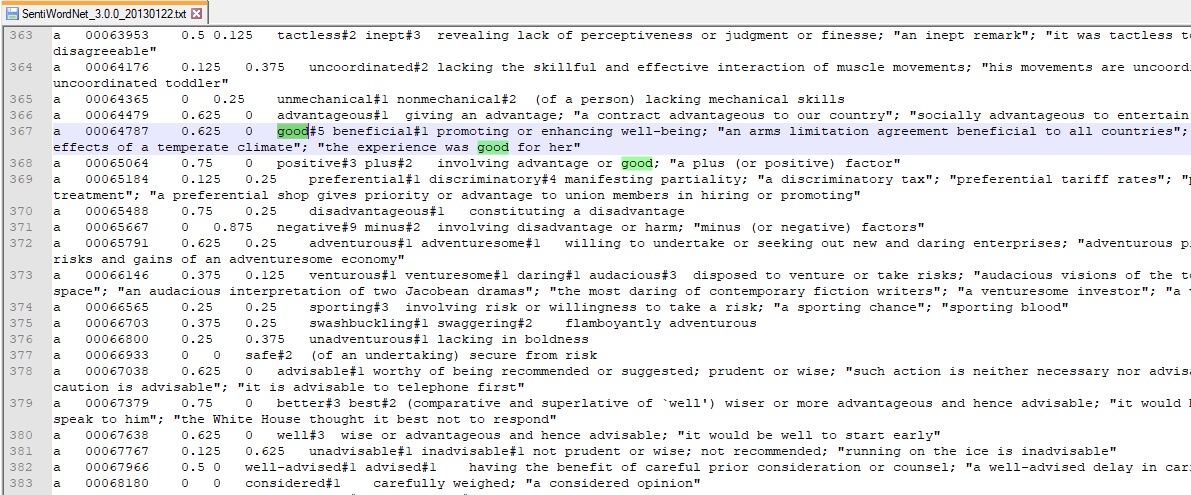

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd

fn = r"/kaggle/input/twitter-product-sentiment-analysis/Twitter Product Sentiment Analysis.csv"
df = pd.read_csv(fn)

print(df.shape)
print(df.head(3))

# **Importing Required Libraries**

In [ ]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
lemmatizer = WordNetLemmatizer()

In [ ]:
!pip install tweet-preprocessor
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.EMOJI)

# **Text PreProcessing**

* Removing Punctuations
* Change Case
* Tokenization
* Removing Stop Words
* Lemmatization

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
cleantweets = []
postags = []
import string
table = str.maketrans('','', string.punctuation)

for tweet in df['tweet']:
    try:
        tweet = p.clean(tweet)
        #tokenize + lower case
        words2 = word_tokenize(tweet.lower())
        #remove puncts
        words3 = [w.translate(table) for w in words2]
        #remove stopwords
        words4 = [word for word in words3 if word not in stop_words]
        #applying lemmatization
        words5 = [lemmatizer.lemmatize(word) for word in words4]
                
        #combining all words
        cleantweets.append((" ".join(words5)).strip())
    except:
        cleantweets.append(tweet)
        continue

print(len(cleantweets))

df['clean_Tweets'] = cleantweets

## **POS Tagging**

In [ ]:
pos=neg=obj=count=0

postagging = []

for tweet in df['clean_Tweets']:
    list = word_tokenize(tweet)
    postagging.append(nltk.pos_tag(list))

df['pos_tags'] = postagging

## **Functions for Sentiment Scoring**

In [ ]:
# Convert between the PennTreebank tags to simple Wordnet tags
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [ ]:
# Returns list of pos-neg and objective score. But returns empty list if not present in senti wordnet.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    #Synset is a special kind of a simple interface that is present in NLTK to look up words in WordNet. 
    #Synset instances are the groupings of synonymous words that express the same concept. 
    #Some of the words have only one Synset and some have several.
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

In [ ]:
pos=neg=obj=count=0
senti_score = []

for pos_val in df['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0    
    
df['senti_score'] = senti_score

In [ ]:
df.head

In [ ]:
df.to_csv("Sentiment_predited_result.csv")

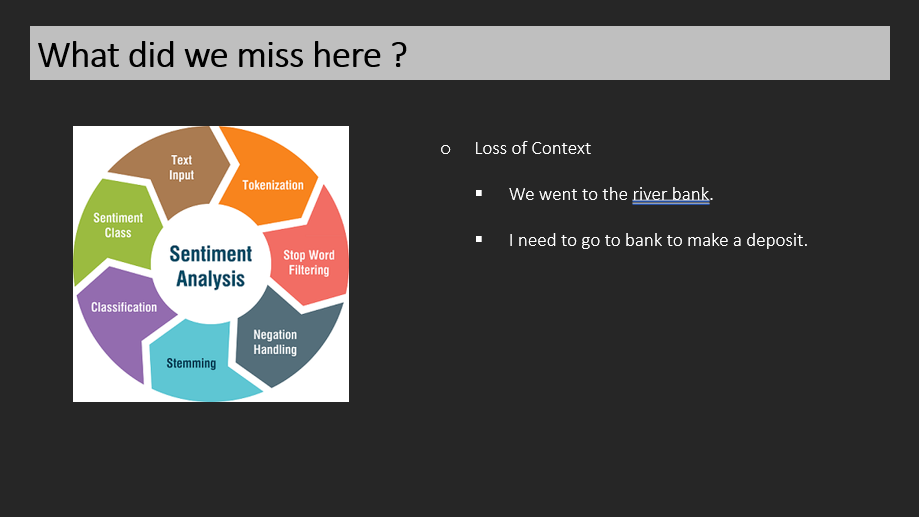

As we have directly used scores provided to words in SentiWordNet library, We missed one important factor to take into consoderation here.

**=> Context** <br>

pos_tag of NLTK is not context sensitive. Hence, Whatever pos_tag we got for Tweet words are also not based on context in which word is used. As you can refer above image, <br>

<1> We went to the river bank <br>
<2> I need to go to bank to make a deposit. <br>

Here **bank** word is common in both sentences, but it is used in different context. <br>

To take into consideration the context of the word and Improve the Sentiment Score accuracy, We have to introduce NLP Word Embeddings like **ELMO** and **BERT** etc. to perform Sentiment Analysis.